In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
water = gpd.read_file(r'C:\Users\melan\Documents\DA8\Projects\geospatial-python-workshop-melaniewesson\data\public_water.geojson')
print(water.crs)
water.head()

EPSG:4326


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,NaN,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)


In [4]:
type(water)

geopandas.geodataframe.GeoDataFrame

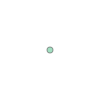

In [5]:
water.loc[0, 'geometry']

In [6]:
print(water.loc[0, 'geometry'])

POINT (-86.89425345576078 36.26250455840148)


<Axes: >

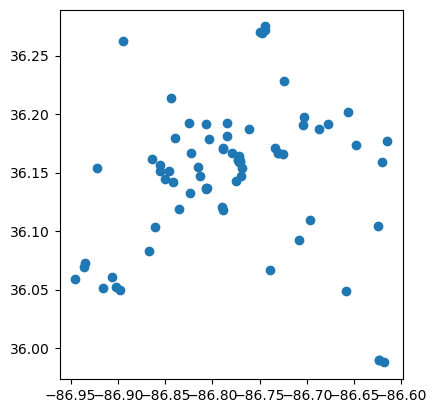

In [7]:
water.plot()

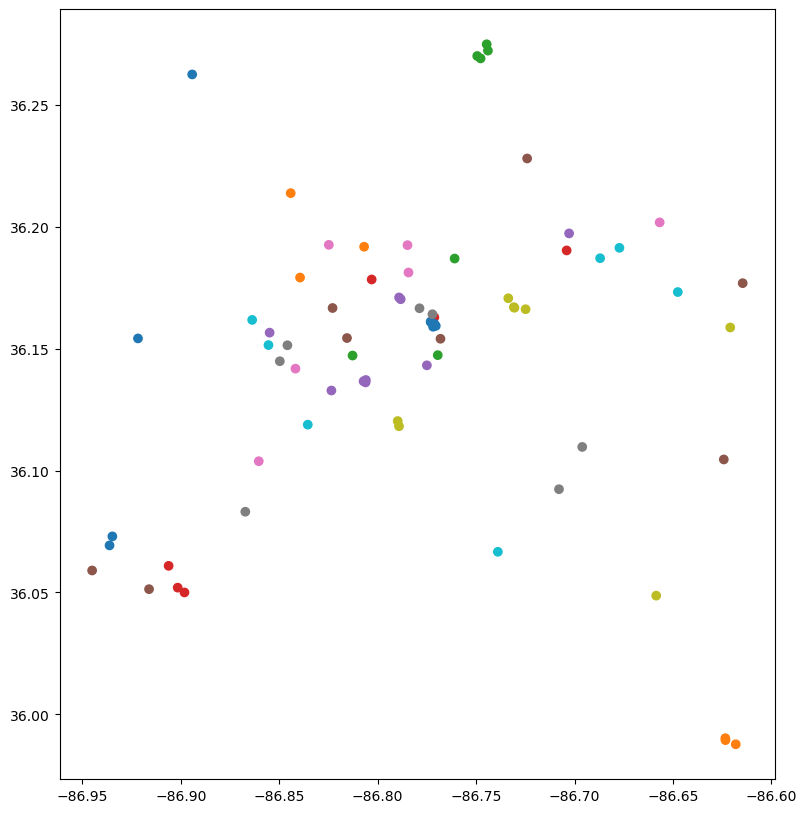

In [10]:
water.plot(column = 'name', figsize=(10,10),)
edgecolor = 'black', 
legend = False
cmap = 'Set2'
plt.show()

In [13]:
parks = gpd.read_file(r'C:\Users\melan\Documents\DA8\Projects\geospatial-python-workshop-melaniewesson\data\metro_parks.geojson')
print(parks.shape)
parks.head()

(287, 10)


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [14]:
type(parks)

geopandas.geodataframe.GeoDataFrame

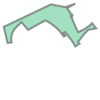

In [15]:
parks.loc[0, 'geometry']

In [16]:
print(parks.loc[0, 'geometry'])

MULTIPOLYGON (((-86.9554652476398 36.079301455798536, -86.95577768867267 36.079139093437696, -86.95554165522448 36.07881679726515, -86.95555002481612 36.078763362963265, -86.95547131924887 36.078720729617956, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.078391071735794, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.078294075262384, -86.95521421491281 36.078266384907266, -86.9552084636451 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.078153868812706, -86.95519898519579 36.078125575091285, -86.95519999833 36.07809727154806, -86.95520236476608 36.078068956381045, -86.9552057503346 36.078040908937375, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.078130121682676, -86.95500338104712 36.0780332215624

<Axes: >

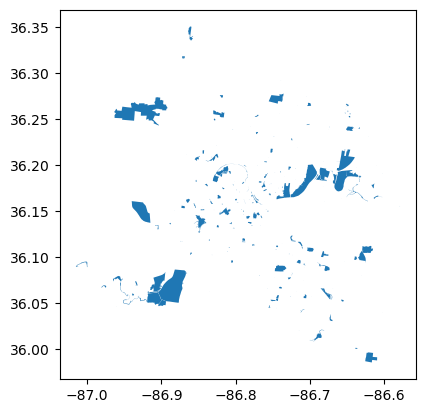

In [17]:
parks.plot()

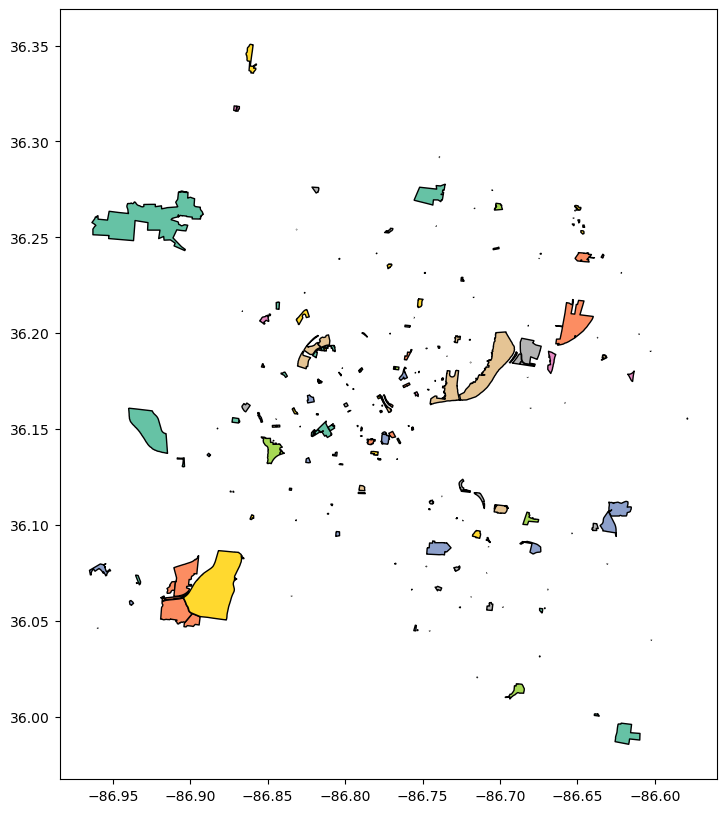

In [21]:
parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = False,
              cmap = 'Set2')
plt.show()

In [23]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
water.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
water_by_park = gpd.sjoin(water, parks, op='within')

c:\Users\melan\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [26]:
water_by_park.head()

,name_left,location,dog,objectid,lon_left,ada,cnt,lat_left,feat_type,geometry,index_right,acres,name_right,year_estab,common_nam,status,address,lon_right,lat_right,descriptio
0,Beaman Water Fountain,NaN,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
69,Harpeth River Greenway,Butler Field Trail Head,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."


In [30]:
water_by_park['name_right']. value_counts()

name_right
Riverfront Park                5
Edwin Warner Park              4
Cedar Hill                     4
Shelby Bottoms Park            3
Cane Ridge Park                3
Fannie Mae Dees Park           3
Shelby Park                    3
Two Rivers Park                2
Sevier Park                    2
McCabe Park                    2
Hadley Park                    1
Hermitage Park                 1
Isaac Litton School Park       1
Alvin G. Beaman Park           1
Parmer Park                    1
Elmington Park                 1
E. N. Peeler Park              1
Woodmont Park                  1
Bellevue Park                  1
City Cemetery                  1
Ted Rhodes Park                1
Fort Negley                    1
Bordeaux-Timothy Drive Park    1
Elizabeth Park                 1
Cumberland Park                1
Buena Vista Park               1
Bordeaux Garden Park           1
Bells Bend Park                1
England                        1
Seven Oaks Park                1

In [33]:
water_in_riverfront = water_by_park.loc[water_by_park['name_right'] == 'Riverfront Park']
water_in_riverfront.shape
water_in_riverfront.head()

,name_left,location,dog,objectid,lon_left,ada,cnt,lat_left,feat_type,geometry,index_right,acres,name_right,year_estab,common_nam,status,address,lon_right,lat_right,descriptio
21,Ascend Amphiteater Water Fountain,Building,N,46586,36.1589887,N,1,-86.77188799,Standard/ADA/Bottle Filler,POINT (-86.77189 36.15899),184,12.54,Riverfront Park,2015,Ascend Amphitheater,PARK,310 1st Ave S,-86.771861,36.160147,NaN
44,Ascend Fitness Area Water Fountain,Fitness Area,N,46633,36.15935444,N,1,-86.77052029,Standard/ADA/Bottle Filler,POINT (-86.77052 36.15935),184,12.54,Riverfront Park,2015,Ascend Amphitheater,PARK,310 1st Ave S,-86.771861,36.160147,NaN
45,Acend Dog Park Water Fountain,Dog Park,Y,46634,36.16105409,N,1,-86.77310593,Standard/ADA/Bottle Filler,POINT (-86.77311 36.16105),184,12.54,Riverfront Park,2015,Ascend Amphitheater,PARK,310 1st Ave S,-86.771861,36.160147,NaN
46,Acend Dog Park Water Fountain,Dog Park,Y,46635,36.16093199,N,1,-86.77307034,Standard/ADA/Bottle Filler,POINT (-86.77307 36.16093),184,12.54,Riverfront Park,2015,Ascend Amphitheater,PARK,310 1st Ave S,-86.771861,36.160147,NaN
71,Ascend Amphiteater Water Fountain,Building,N,0,36.16014227,N,1,-86.77120998,Standard/ADA/Bottle Filler,POINT (-86.77121 36.16014),184,12.54,Riverfront Park,2015,Ascend Amphitheater,PARK,310 1st Ave S,-86.771861,36.160147,NaN


In [32]:
polygonriverfront = parks.loc[parks['name'] == 'Riverfront Park']
polygonriverfront.shape

(4, 10)

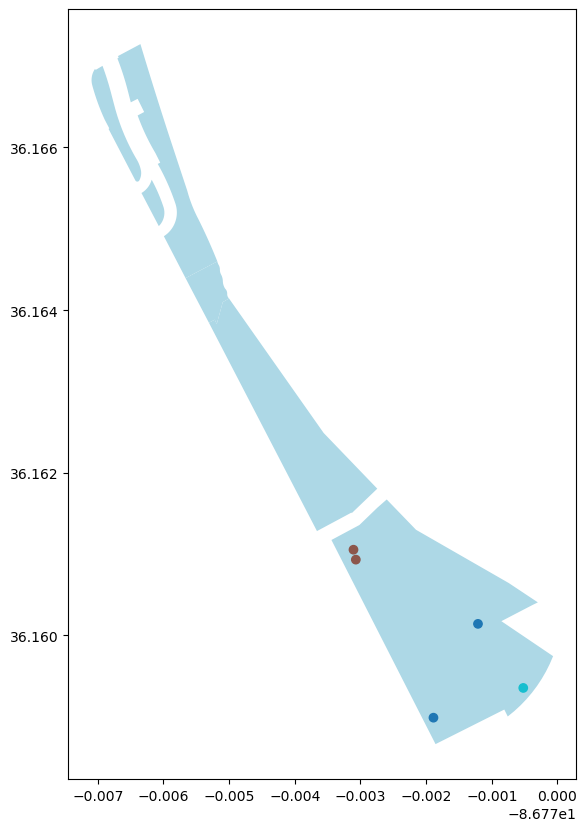

In [35]:
ax = polygonriverfront.plot(figsize = (8, 10), color = 'lightblue')
water_in_riverfront.plot (ax = ax, column = 'location');
plt.show()

In [36]:
polygonriverfront.geometry.centroid

C:\Users\melan\AppData\Local\Temp\ipykernel_12836\3043177243.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygonriverfront.geometry.centroid


53     POINT (-86.77611 36.16584)
55     POINT (-86.77530 36.16424)
59     POINT (-86.77404 36.16256)
184    POINT (-86.77175 36.16015)
dtype: geometry

In [37]:
center = polygonriverfront.geometry.centroid[184]
print(center)

POINT (-86.77175483423353 36.160149070720415)


C:\Users\melan\AppData\Local\Temp\ipykernel_12836\1915521075.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygonriverfront.geometry.centroid[184]


In [38]:
area_center = [center.y, center.x]
print(area_center)

[36.160149070720415, -86.77175483423353]


In [58]:
map_riverfront = folium.Map(location = area_center, zoom_start = 18)
map_riverfront

In [51]:
i = 0
for row_index, row_values in water_in_riverfront.iterrows():
    if i <3:
        print('index is', row_index)
        print('values_are:')
        print(' ')
        print(row_values)
        print('-----------------------')
        i+=1

index is 21
values_are:
 
name_left                 Ascend Amphiteater Water Fountain
location                                           Building
dog                                                       N
objectid                                              46586
lon_left                                         36.1589887
ada                                                       N
cnt                                                       1
lat_left                                       -86.77188799
feat_type                        Standard/ADA/Bottle Filler
geometry       POINT (-86.77188799128072 36.15898870023951)
index_right                                             184
acres                                                 12.54
name_right                                  Riverfront Park
year_estab                                             2015
common_nam                              Ascend Amphitheater
status                                                 PARK
address       

In [67]:
water_in_riverfront['lat_left'] = water_in_riverfront['lat_left'].astype(float)
water_in_riverfront['lon_left'] = water_in_riverfront['lon_left'].astype(float)
water_in_riverfront.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5 entries, 21 to 71
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name_left    5 non-null      object  
 1   location     5 non-null      object  
 2   dog          5 non-null      object  
 3   objectid     5 non-null      object  
 4   lon_left     5 non-null      float64 
 5   ada          5 non-null      object  
 6   cnt          5 non-null      object  
 7   lat_left     5 non-null      float64 
 8   feat_type    5 non-null      object  
 9   geometry     5 non-null      geometry
 10  index_right  5 non-null      int64   
 11  acres        5 non-null      object  
 12  name_right   5 non-null      object  
 13  year_estab   5 non-null      object  
 14  common_nam   5 non-null      object  
 15  status       5 non-null      object  
 16  address      5 non-null      object  
 17  lon_right    5 non-null      object  
 18  lat_right    5 non-null      

c:\Users\melan\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\melan\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [68]:
map_riverfront = folium.Map(location = area_center, zoom_start = 16)
folium.GeoJson(polygonriverfront).add_to(map_riverfront)

for row_index, row_values in water_in_riverfront.iterrows():
    loc = [row_values['lat_left'], row_values['lon_left']]
    pop = str(row_values['name_left'])
    icon=folium.Icon(color="blue",icon="paw", prefix='fa')

    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(map_riverfront)
map_riverfront.save('../maps/mapsriverfront.html')

map_riverfront